<a href="https://colab.research.google.com/github/ferrazzijk/TPT-Web-Scraping/blob/main/TPT_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TPT Web Scraping**

The task at hand for this project was to scrape data from a website while learning to use Sellenium for the first time. 

The site, Teachers Pay Teachers, is an online platform where educators sell their own created resources for other educators to purchase and use in their classroom.  

Data Retrieved Includes
*   Product Title
*   Seller Store Name
*   Product Price
*   Product Rating
*   Amount of Reviews
*   Product Type
*   Description
*   Learning Standards

The data comes from Teachers Pay Teachers and can be found [here](https://www.teacherspayteachers.com/Browse/Grade-Level/Eighth/Core-Standard/8.G.A.1,8.G.A.2,8.G.A.1a,8.G.A.1b,8.G.A.1c,8.G.A.3,8.G.A.4,8.G.A.5,8.G.B.6,8.G.B.7,8.G.B.8,8.G.C.9). 

**Works Cited**

Teachers Pay Teachers. “8th Grade Common Core Worksheets & Activities | CCSS 8.G.A.1.” Teachers Pay Teachers, Teachers Pay Teachers, www.teacherspayteachers.com/Browse/Grade-Level/Eighth/Core-Standard/8.G.A.1,8.G.A.2,8.G.A.1a,8.G.A.1b,8.G.A.1c,8.G.A.3,8.G.A.4,8.G.A.5,8.G.B.6,8.G.B.7,8.G.B.8,8.G.C.9. Accessed 2021.

In [ ]:
# Set Environment & Make Imports
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from bs4 import BeautifulSoup
from IPython.core.display import clear_output
from random import randint
from time import time
from time import sleep
from warnings import warn
from wordcloud import WordCloud

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
B

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: use options instead of chrome_options


In [ ]:
#make initial request
d = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
url = 'https://www.teacherspayteachers.com/Browse/Grade-Level/Eighth/Core-Standard/8.G.A.1,8.G.A.2,8.G.A.1a,8.G.A.1b,8.G.A.1c,8.G.A.3,8.G.A.4,8.G.A.5,8.G.B.6,8.G.B.7,8.G.B.8,8.G.C.9'

#get info form url
d.get(url)

#click the hidden elements
dot_list_elements = d.find_elements_by_class_name("AnchorList__toggle")
print(len(dot_list_elements))
for clickable in dot_list_elements:
  clickable.click()
sleep(3)

#pass data to Beautiful Soup
soup = BeautifulSoup(d.page_source, 'html.parser')

#find all elements with class ProductRowTitleBespoke
summary = soup.select('.SearchProductRowLayout')
print('Number of Results Returned: ', len(summary))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


9
Number of Results Returned:  24


**Define a Function and Process Multiple Pages of Results**

In [ ]:
# Define a function to process the page
def process_page(soup, resources):  
  
  # Find all elements with class SearchProductRowLayout
  raw_resources = soup.select('.SearchProductRowLayout')
  
  # remove the original price if the listing is on sale
  for div in soup.find_all('div', {'class':'ProductRowPriceBespoke__priceRow ProductRowPriceBespoke__discountPriceToTheRight'}): div.decompose()

  #Extract the info for each listing
  for resource, i in zip(raw_resources, range(0,25)):
    title = resource.select_one('.ProductRowTitleBespoke > h2 > a').get_text() # Extract the title of the resource
    store = resource.select_one('.ProductRowStoreBespoke__storeName > a').get_text().strip() # Extract the store name
    price = resource.select_one('.ProductRowPriceBespoke__priceRow').get_text().strip() #extract the price
    num_ratings = resource.select_one('.ProductRowRatingBespoke__evaluationRating').get_text() #extract the number of reviewers
    # rating_stars = resource.select_one('.Rating') #extract the star ratings
    # rating = [len(rating_stars)] #extract number of stars
    description = resource.select_one('.SearchProductRowLayout__description').get_text().strip() #extract the description
    ccss = resource.select_one('.AnchorList').get_text().strip() #extract the common core state standards

    #get the rating info
    #get the star rating & number of ratings of each resource
    rating_stars = soup.select('.Rating__star > svg > svg')
    #initialize a list to store all the star fullness widths
    all_stars = []
    #iterate over rating_stars to get all fullness widths as a float
    for y in range(120):
      all_stars.append(float(str(rating_stars[y]['width'].split('%')[0])))
    #add every 5 all_stars elements together
    ratings = []
    for x in range(0,120,5):
      ratings.append(sum(all_stars[x:x+5])/100)
    #extract each listing's rating
    rating = ratings[i]

    #get the resource info
    resource_info = soup.find_all(class_ = 'TruncatedTextBox LabeledSectionBespoke__content')
    info = [information.get_text() for information in resource_info]
    r_types = info[2::3]
    resource_type = r_types[i] #extract the resource type

    #construct a dictionary
    new_resource = {'title': title, 'store':store, 'price':price, 
                    'rating':rating, 'num_reviewers':num_ratings, 
                    'resource_type':resource_type, 'description':description,
                    'ccss':ccss}
    resources.append(new_resource) # Add dictionary to list
    
# Prepare for the monitoring logic
start_time = time() # Note the system time when the program starts
request_count = 0 # Track the number of requests made

# Create variables to store the data
resources = []

# Variables to handle the request loop
MAX_REQUESTS = 43 
page_number = 1
query = {'Page:': page_number}

#make initial request
d = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
url = 'https://www.teacherspayteachers.com/Browse/Grade-Level/Eighth/Core-Standard/8.G.A.1,8.G.A.2,8.G.A.1a,8.G.A.1b,8.G.A.1c,8.G.A.3,8.G.A.4,8.G.A.5,8.G.B.6,8.G.B.7,8.G.B.8,8.G.C.9'

#unhide the hidden ccss by clicking the ... on the TPT site
dot_list_elements = d.find_elements_by_xpath("//div[@class='AnchorList']/span[@class='AnchorList__toggle']")
for clickable in dot_list_elements:
  clickable.click()
sleep(3)

while request_count <= MAX_REQUESTS:
  # Keep the output clear.
  clear_output(wait = True)
  
  # Make an initial request
  d.get(url)
  
  #unhide the hidden ccss by clicking the ... on the TPT site
  dot_list_elements = d.find_elements_by_xpath("//div[@class='AnchorList']/span[@class='AnchorList__toggle']")
  for clickable in dot_list_elements:
    clickable.click()
  sleep(3)

  #pass to beautiful soup
  soup = BeautifulSoup(d.page_source, 'html.parser')
  
  #call function on soup & resources
  process_page(soup, resources) 
  
  #increment request count
  request_count += 1
  
  # Go to sleep for a bit to put time in between requests  
  sleep(randint(1,5))
  
  # Output some logs for monitoring
  elapsed_time = time() - start_time
  print('Requests: {}, Frequency: {} requests/s, {} resources processed.'.format(request_count, request_count/elapsed_time, len(resources)))
  
  # Prepare for next iteration
  page_number += 1
      
print('Scraping complete')
print('Requests: {}, Frequency: {} requests/s, {} resources processed.'.format(request_count, request_count/elapsed_time, len(resources)))

Requests: 44, Frequency: 0.08048112182873299 requests/s, 1056 resources processed.
Scraping complete
Requests: 44, Frequency: 0.08048112182873299 requests/s, 1056 resources processed.


In [ ]:
resources[0:6]

[{'ccss': '8.F.B.5, 8.F.B.4, 8.F.A.3, 8.F.A.2, 8.F.A.1, 8.EE.C.8c, 8.EE.C.8b, 8.EE.C.8a, 8.EE.C.8, 8.EE.C.7b, 8.EE.C.7a, 8.EE.C.7, 8.EE.B.6, 8.EE.B.5, 8.EE.A.4, 8.EE.A.3, 8.EE.A.2, 8.EE.A.1, 8.NS.A.2, 8.NS.A.1, 8.SP.A.4, 8.SP.A.3, 8.SP.A.2, 8.SP.A.1, 8.G.C.9, 8.G.B.8, 8.G.B.7, 8.G.B.6, 8.G.A.5, 8.G.A.4, 8.G.A.3, 8.G.A.2, 8.G.A.1c, 8.G.A.1b, 8.G.A.1a, 8.G.A.1Hide',
  'description': "This 8th Grade math spiral review resource can easily be used as math HOMEWORK, WARM UPS, or a DAILY MATH REVIEW! This resource was designed to keep math concepts fresh all year and to help you easily track student progress. All pages are 100% EDITABLE and easy to differentiate to fit your students'",
  'num_reviewers': '1,099',
  'price': '$29.99',
  'rating': 5.0,
  'resource_type': 'Worksheets, Assessment, Homework',
  'store': 'One Stop Teacher Shop',
  'title': '8th Grade Math Spiral Review & Quizzes | Homework or Warm Ups'},
 {'ccss': '8.G.B.8, 8.G.B.7',
  'description': 'Pythagorean Theorem:  2-page "

In [ ]:
#convert resources list to a df
tpt_resources_df = pd.DataFrame(data = resources, columns = ['title', 'store',
                    'price', 'rating','num_reviewers', 'resource_type', 
                    'description','ccss'])

#reformatting some punctuation within certain columns
tpt_resources_df['price'] = tpt_resources_df['price'].astype(str).str.replace('$','')
tpt_resources_df['num_reviewers'] = tpt_resources_df['num_reviewers'].astype(str).str.replace(',','')
tpt_resources_df['ccss'] = tpt_resources_df['ccss'].astype(str).str.replace('Hide','')

tpt_resources_df.head()

,title,store,price,rating,num_reviewers,resource_type,description,ccss
0,8th Grade Math Spiral Review & Quizzes | Homew...,One Stop Teacher Shop,29.99,5.00,1099,"Worksheets, Assessment, Homework",This 8th Grade math spiral review resource can...,"8.F.B.5, 8.F.B.4, 8.F.A.3, 8.F.A.2, 8.F.A.1, 8..."
1,Pythagorean Theorem Doodle Notes,Math Giraffe,3.25,4.92,1089,"Activities, Printables, Graphic Organizers","Pythagorean Theorem: 2-page ""doodle notes"" - ...","8.G.B.8, 8.G.B.7"
2,Geometry Town Project: Using Geometric Vocabul...,Shawna H,4.50,5.00,830,"Activities, Fun Stuff, Assessment",This has been my students' favorite project th...,"8.G.A.5, 7.G.B.5"
3,Angle Relationships Worksheet - Finding Angle ...,Amazing Mathematics,1.50,4.92,706,"Activities, Printables",Printable PDF & Digital Versions are included ...,"8.G.A.5, 7.G.B.5"
4,8th Grade Math Warm-Ups (CCSS-Aligned Math Bel...,Maneuvering the Middle,16.00,5.00,651,"Assessment, Printables",These 120 daily math warm-ups can be used as b...,"8.F.B.5, 8.F.B.4, 8.F.A.3, 8.F.A.2, 8.F.A.1, 8..."


In [ ]:
#view the shape of the data scraped
tpt_resources_df.shape

(1056, 8)

In [ ]:
#investigate dtypes of columns
tpt_resources_df.dtypes

title             object
store             object
price             object
rating           float64
num_reviewers     object
resource_type     object
description       object
ccss              object
dtype: object

In [ ]:
#convert the dtypes of price & rating to numeric dtypes
tpt_resources_df['price'] = tpt_resources_df['price'].astype(float)
tpt_resources_df['rating'] = tpt_resources_df['rating'].astype(float)
tpt_resources_df['num_reviewers'] = tpt_resources_df['num_reviewers'].astype(int)
tpt_resources_df.dtypes

title             object
store             object
price            float64
rating           float64
num_reviewers      int64
resource_type     object
description       object
ccss              object
dtype: object

In [ ]:
#find descriptive statistics for price, rating, & num_reviewers
tpt_resources_df[['price', 'rating', 'num_reviewers']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,1056.0,10.430833,13.799337,1.50,3.875,6.50,10.5,70.0
rating,1056.0,4.960833,0.044360,4.84,4.920,4.98,5.0,5.0
num_reviewers,1056.0,524.333333,214.996499,324.00,366.000,456.00,589.0,1099.0


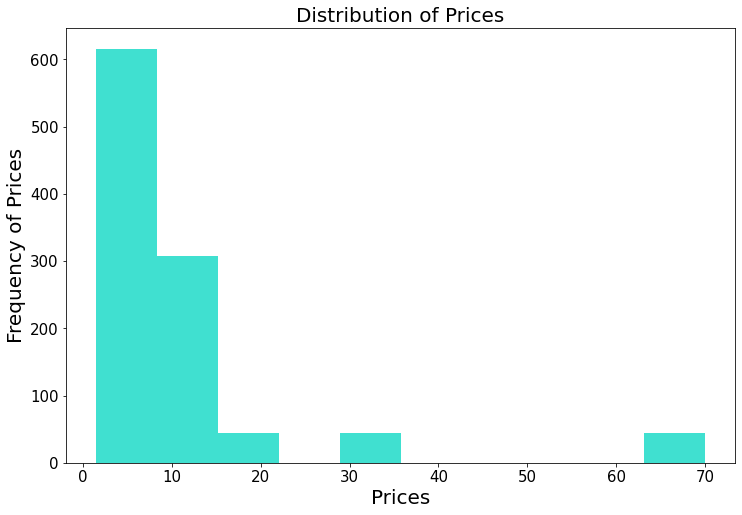

In [ ]:
#How are prices distributed?
plt.figure(figsize=(12,8))
plt.hist(tpt_resources_df['price'], color='turquoise')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Prices', fontsize = 20)
plt.xlabel('Prices', fontsize = 20)
plt.ylabel('Frequency of Prices', fontsize = 20)
plt.show()

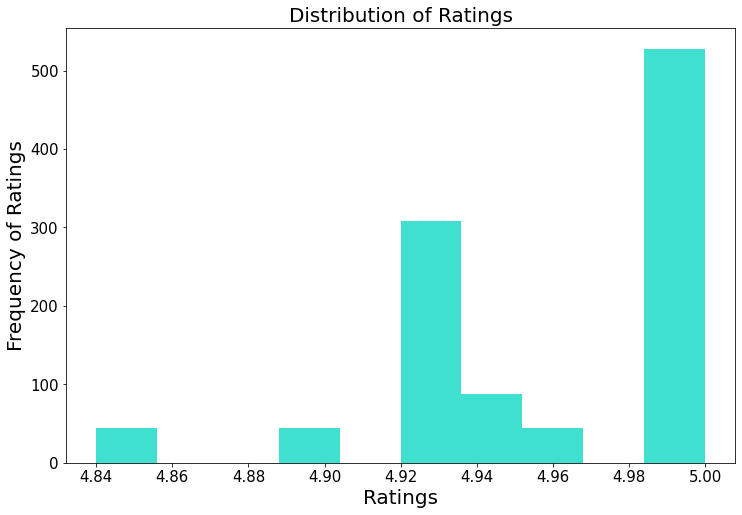

In [ ]:
#How are ratings distributed?
plt.figure(figsize=(12,8))
plt.hist(tpt_resources_df['rating'], color='turquoise')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Ratings', fontsize = 20)
plt.xlabel('Ratings', fontsize = 20)
plt.ylabel('Frequency of Ratings', fontsize = 20)
plt.show()

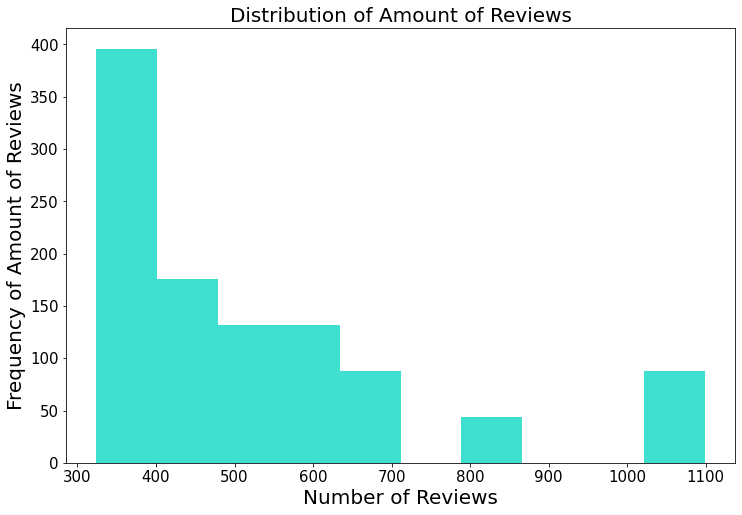

In [ ]:
#How are number of reviews distributed?
plt.figure(figsize=(12,8))
plt.hist(tpt_resources_df['num_reviewers'], color='turquoise')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Amount of Reviews', fontsize = 20)
plt.xlabel('Number of Reviews', fontsize = 20)
plt.ylabel('Frequency of Amount of Reviews', fontsize = 20)
plt.show()

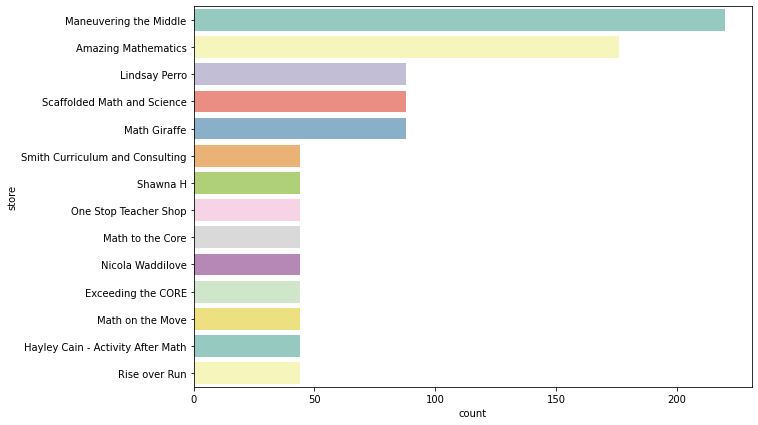

In [ ]:
#Most Popular Stores
plt.figure(figsize=(10,7))
sns.countplot(y='store', palette='Set3',data=tpt_resources_df,
  order=tpt_resources_df['store'].value_counts().index)
plt.show()

In [ ]:
#How many unique sellers?
tpt_resources_df['store'].nunique()

14

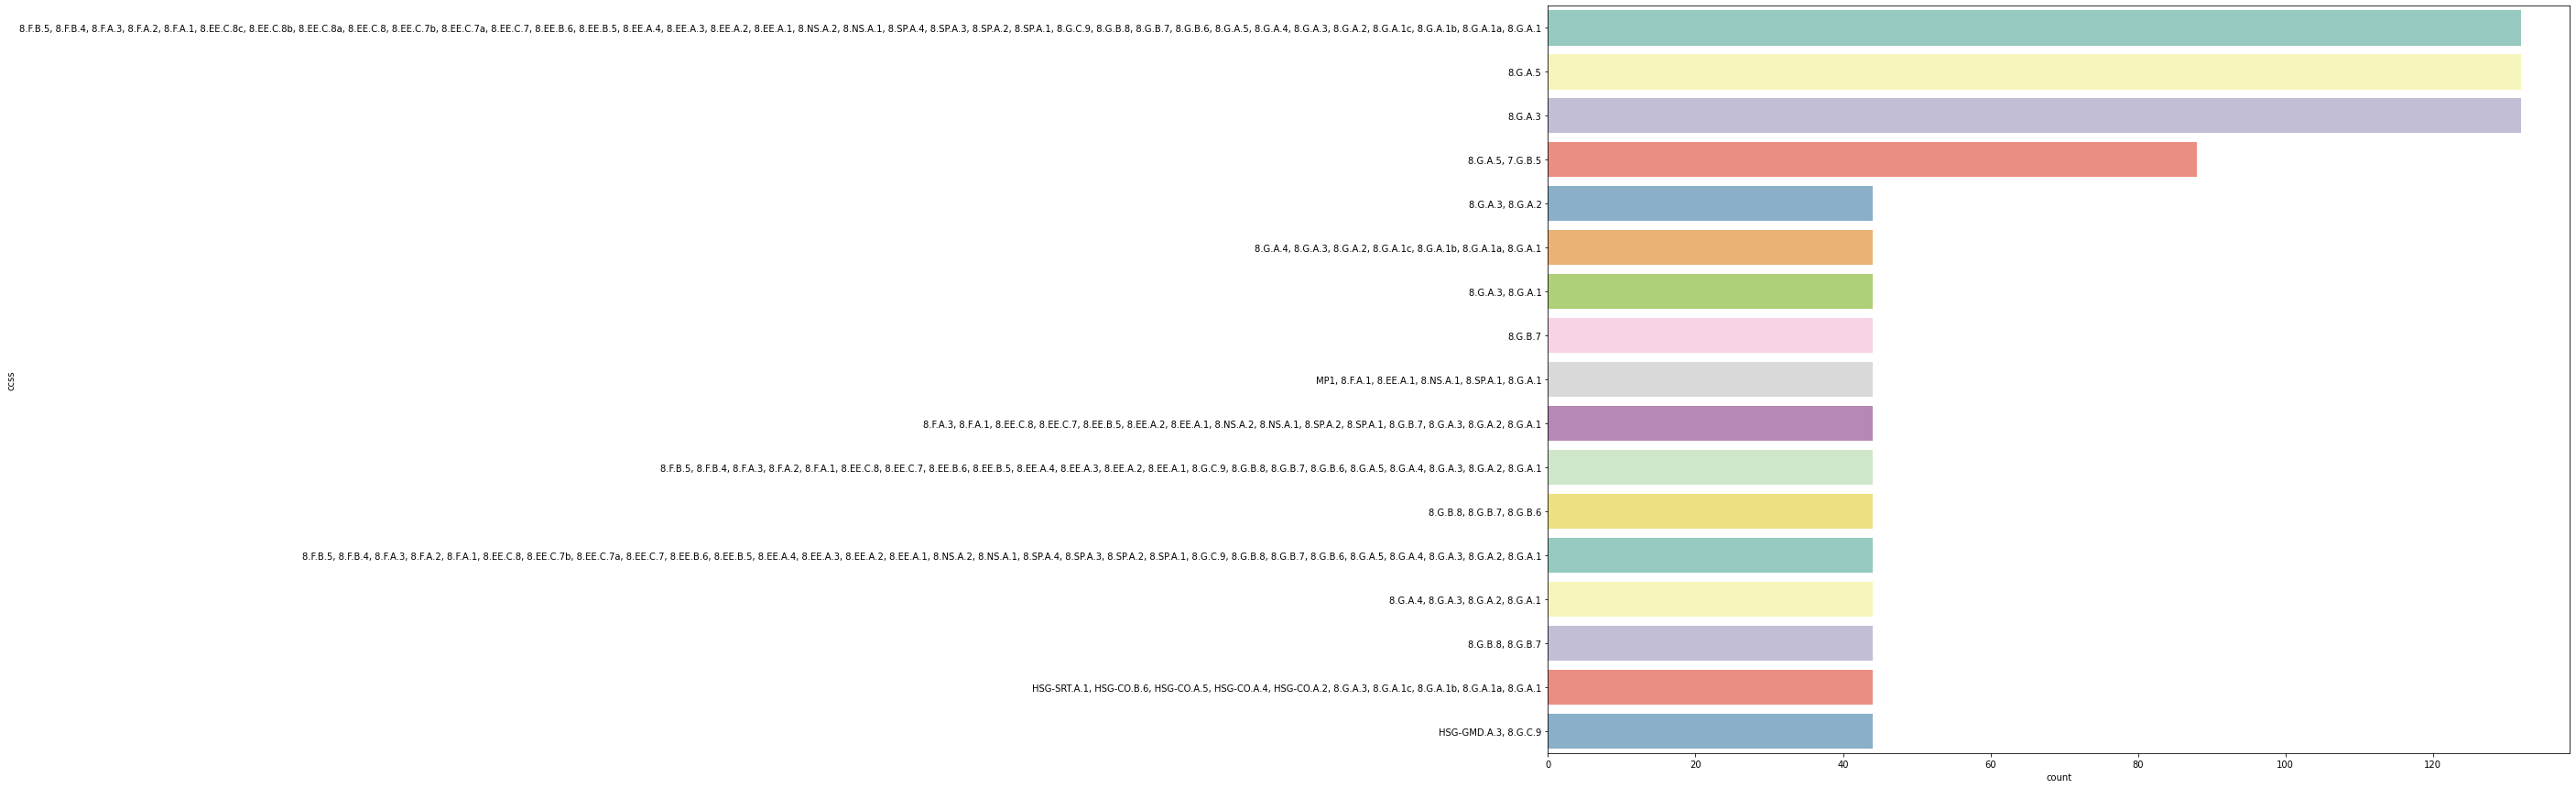

In [ ]:
#Most Popular Standards
plt.figure(figsize=(20,15))
sns.countplot(y='ccss', palette='Set3',data=tpt_resources_df,
  order=tpt_resources_df['ccss'].value_counts().index)
plt.show()

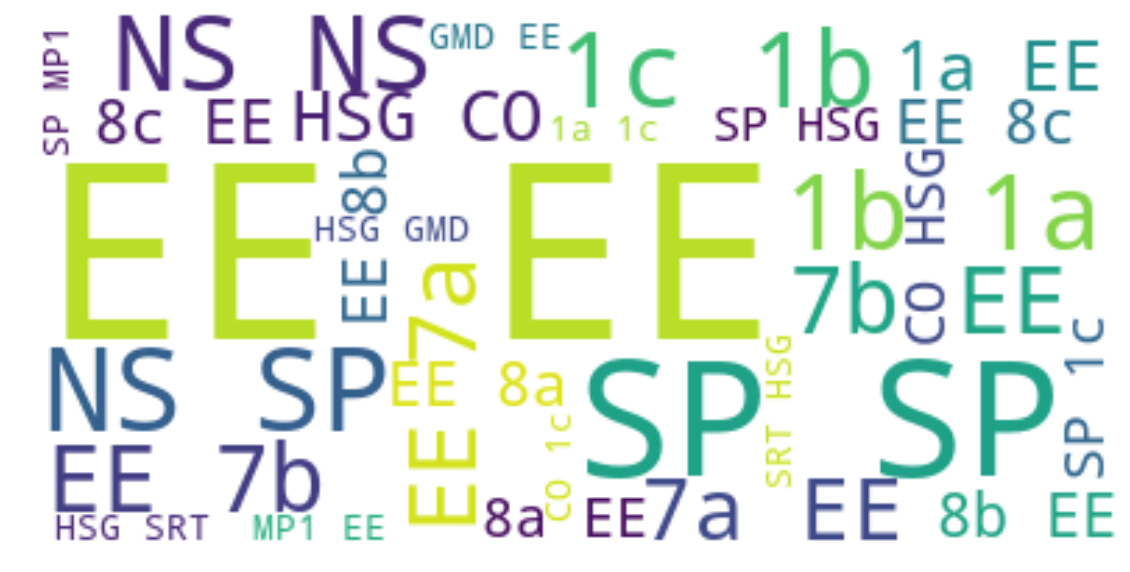

In [ ]:
#Generate a word cloud for most popular standards
wordcloud = WordCloud(background_color='white').generate(" ".join(tpt_resources_df['ccss']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()